In [1]:
import os
os.chdir("/home/149/ab8992/tasman-tides")
# from recipes import surfacespeed
from importlib import reload
import ttidelib as tt
from ttidelib import logmsg
import shutil
import subprocess
import dask
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
experiment,outputs = "full-20","output*"
from dask.distributed import Client, default_client
from pathlib import Path
client = Client(threads_per_worker = 1,n_workers = 50)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 50
Total threads: 50,Total memory: 416.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42359,Workers: 50
Dashboard: /proxy/8787/status,Total threads: 50
Started: Just now,Total memory: 416.00 GiB
Comm: tcp://127.0.0.1:43023,Total threads: 1
Dashboard: /proxy/43993/status,Memory: 8.32 GiB
Nanny: tcp://127.0.0.1:34215,


2025-05-22 17:20:37,985 - bokeh.server.protocol_handler - ERROR - error handling message
 message: Message 'PATCH-DOC' content: {'events': [{'kind': 'ModelChanged', 'model': {'id': 'p12177'}, 'attr': 'end', 'new': 3.475477822432058}]} 
 error: AssertionError()
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/bokeh/server/protocol_handler.py", line 97, in handle
    work = await handler(message, connection)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/bokeh/server/session.py", line 295, in patch
    return connection.session._handle_patch(message, connection)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/bokeh/server/connection.py", line 65, in session
    assert self._session is not None
AssertionError
2025-05-22 17:20:38,080 - bokeh.server.protocol_handler - ERROR - error handling message
 message: Message 'PATCH-

In [ ]:
# def vmodes(expt,t0 = 10000):
expt,t0 = "full-80",12023

# client = tt.startdask(nthreads = 1)
print(client)
tt.logmsg(f"Starting vertical modes calculation for {expt} {t0}")
data = tt.collect_data(
        exptname=expt,
        rawdata = ["rho"],
        timerange = (t0 - 20,t0 + 20 )
    ).sel(yb = slice(-125,125))
if "zi" in data:
    data = data.drop_vars("zi")
H = data.bathy
if H.mean("xb").mean("yb") <= 0:
    H *= -1
print("Loading average of N...")
N = tt.getN(data.rho).mean("time")# Don't load. We'll coarsen first.load()


print("Collected N,coarsening..")
data = xr.merge([N.rename("N"),H.rename("H")]).coarsen(xb = 4,yb = 4,boundary = "trim").mean().load()
print("coarsened. Now vmodes")
data = data.chunk({"xb":1,"yb":1,"zl":-1})

tt.logmsg("Calculating vertical modes")
out = tt.ShootingVmodes_parallel(data,nmodes = 8).load()
tt.logmsg("success")
if not os.path.exists(f"/g/data/nm03/ab8992/postprocessed/{expt}/vertical_eigenfunctions"):
    os.makedirs(f"/g/data/nm03/ab8992/postprocessed/{expt}/vertical_eigenfunctions")
out.to_netcdf(f"/g/data/nm03/ab8992/postprocessed/{expt}/vertical_eigenfunctions/vmode-t0-{t0}.nc")
## Maybe use interp_like to multiply the low res vmodes by high res velocities later? 

# vmodes("full-80",12023)

<Client: 'tcp://127.0.0.1:42359' processes=50 threads=50, memory=416.00 GiB>
80th run: adjusting outputs to [95 96]
loading rho...	done.
Loading average of N...
Collected N,coarsening..


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sqrt
  return fu

coarsened. Now vmodes


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 46.25 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/home/149/ab8992/tasman-tides/ttidelib.py:1274: RuntimeWarning: The number of calls to function has reached maxfev = 10.
  fsolve(
/home/149/ab8992/tasman-tides/ttidelib.py:1274: RuntimeWarning: The number of calls to function has reached maxfev = 10.
  fsolve(
/home/149/ab8992/tasman-tides/ttidelib.py:1274: RuntimeWarning: The number of calls to function has reached maxfev = 10.
  fsolve(
/home/149/ab8992/tasman-tides/ttidelib.py:1274: RuntimeWarning: The number of calls to function has reached maxfev = 10.
  fsolve(
/home/149/ab8992/tasman-tides/ttidelib.py:1274: RuntimeWarning: The number of calls to function has reached maxfev = 10.
  fsolve(
/home/149/ab8992/tasman-tides/ttidelib.py:1274: RuntimeWarning: The number 

/home/149/ab8992/tasman-tides/ttidelib.py:1274: RuntimeWarning: The number of calls to function has reached maxfev = 10.
  fsolve(
/home/149/ab8992/tasman-tides/ttidelib.py:1274: RuntimeWarning: The number of calls to function has reached maxfev = 10.
  fsolve(
/home/149/ab8992/tasman-tides/ttidelib.py:1274: RuntimeWarning: The number of calls to function has reached maxfev = 10.
  fsolve(
/home/149/ab8992/tasman-tides/ttidelib.py:1274: RuntimeWarning: The number of calls to function has reached maxfev = 10.
  fsolve(
/home/149/ab8992/tasman-tides/ttidelib.py:1274: RuntimeWarning: The number of calls to function has reached maxfev = 10.
  fsolve(
2025-05-22 17:32:03,748 - distributed.worker_memory - ERROR - 
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/psutil/_common.py", line 491, in wrapper
    ret = self._cache[fun]
AttributeError: 'Process' object has no attribute '_cache'

During handling of the abo

In [3]:
N

<xarray.DataArray 'N' (zl: 100, yb: 61, xb: 376)> Size: 9MB
dask.array<mean_agg-aggregate, shape=(100, 61, 376), dtype=float32, chunksize=(99, 6, 376), chunktype=numpy.ndarray>
Coordinates:
  * zl       (zl) float64 800B 2.704 8.126 13.58 ... 5.339e+03 5.443e+03
  * xb       (xb) float64 3kB -0.0 4.0 8.0 12.0 ... 1.492e+03 1.496e+03 1.5e+03
  * yb       (yb) float64 488B -120.0 -116.0 -112.0 -108.0 ... 112.0 116.0 120.0
    lon      (yb, xb) float64 183kB dask.array<chunksize=(61, 376), meta=np.ndarray>
    lat      (yb, xb) float64 183kB dask.array<chunksize=(61, 376), meta=np.ndarray>

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sqrt
  return fu

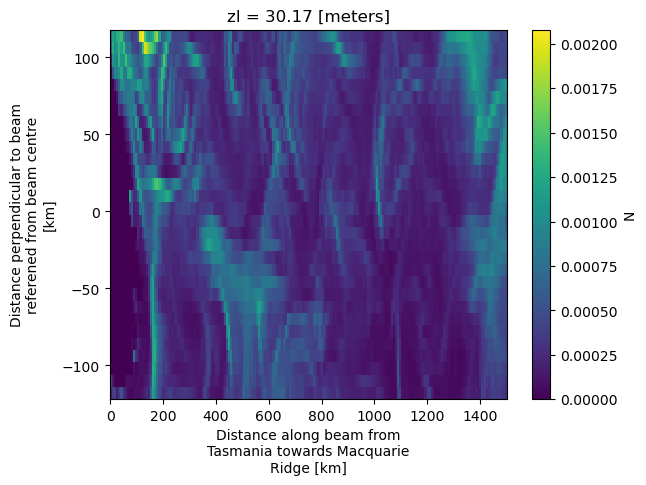

In [8]:
N.coarsen(xb=2,yb=2,boundary = "trim").mean().isel(zl = 5).plot()